In [1]:
#实验1.2 最小二乘法求解一元线性回归方程
#先写了class版本
#后面是函数版本

In [2]:
#class 版本————————————————————————

In [3]:
import mindspore.numpy as np
x=np.array([55,71,68,87,101,87,75,78,93,73]).asnumpy()
y=np.array([91,101,87,109,129,98,95,101,104,93]).asnumpy()

In [4]:
class ols():
    def __init__(self):
        """
        w1 -- 线性方程系数
        w2 -- 线性方程的截距
        """
        self.w1=None
        self.w2=None
    def ols_algebra(self,x,y):
        """
        最小二乘自定义函数
        input:
        x--自变量
        y--因变量
        return：
        w1 -- 线性方程系数
        w2 -- 线性方程的截距
        """
        n=len(x)
        self.w1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x*x)-sum(x)*sum(x))
        self.w2=(sum(x*x)*sum(y)- sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
        return self.w1, self.w2
    def ols_gradient_descent(self,x, y,lr,num_liter):
        """
        使用最小二乘梯度下降自定义函数求解线性回归方程参数
        input
        x--自变量
        y--因变量
        return：
        w1 -- 线性方程系数
        w2 -- 线性方程的截距
        """
        self.w1=0
        self.w2=0
        for i in range(num_liter):
            y_hat=(self.w1*x)+self.w2
            self.w1_gradient=-2*sum(x*(y-y_hat))
            self.w2_gradient=-2*sum(y-y_hat)
            self.w1-=lr*self.w1_gradient
            self.w2-=lr*self.w2_gradient
        return self.w1, self.w2
    

In [5]:
OLS=ols()

In [6]:
#使用最小二乘法自定义函数求解线性回归方程参数
w1_,w0_=OLS.ols_algebra(x,y)
print(w1_,w0_)

0.7175629008386778 44.25604341391219


In [7]:
#使用最小二乘梯度下降自定义函数求解线性回归方程参数
w1,w0=OLS.ols_gradient_descent(x,y,lr=0.00001,num_liter=500)
print(w1,w0)

1.2633124475159723 0.12807483308616532


Text(0.5, 1.0, 'Gradient descent')

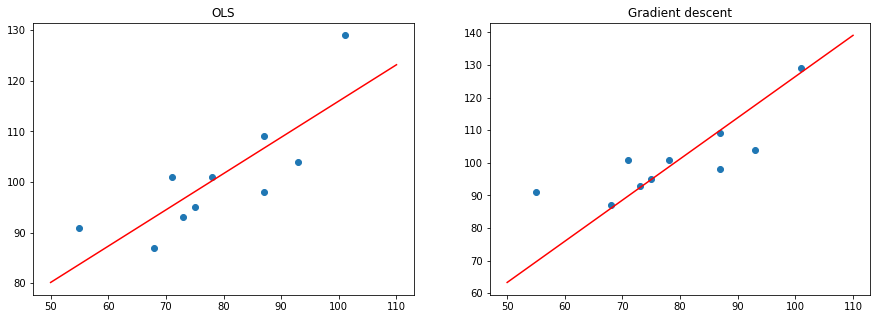

In [8]:
#绘制图像
from matplotlib import  pyplot as  plt
import numpy as np
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].scatter(x,y)
axes[0].plot(np.array([50,110]),np.array([50,110])*w1_+w0_,'r')
axes[0].set_title('OLS')

axes[1].scatter(x,y)
axes[1].plot(np.array([50,110]),np.array([50,110])*w1+w0,'r')
axes[1].set_title('Gradient descent')

In [9]:
#函数版本————————————————————————

In [10]:
#1.定义x,y
import numpy as np
x=np.array([55,71,68,87,101,87,75,78,93,73])
y=np.array([91,101,87,109,129,98,95,101,104,93])

In [11]:
#单纯的最小二乘
#2.1最小二乘自定义函数
def ols_algebra(x,y):
    """
    x--自变量
    y--因变量
    返回值：
    w1 -- 线性方程系数
    w2 -- 线性方程的截距
    """
    n=len(x)
    w1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x*x)-sum(x)*sum(x))
    w0=(sum(x*x)*sum(y)- sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
    
    return w1,w0

In [12]:
#3.1使用最小二乘法自定义函数求解线性回归方程参数
#求解w1，w0
w1,w0=ols_algebra(x,y)
print(w1)
print(w0)

0.7175629008386778
44.25604341391219


In [13]:
#最小二乘梯度下降
#2.2最小二乘梯度下降自定义函数
def ols_gradient_descent(x, y,lr,num_liter):
    """
    x--自变量
    y--因变量
    返回值：
    w1 -- 线性方程系数
    w2 -- 线性方程的截距
    """
    w1=0
    w0=0
    for i in range(num_liter):
        y_hat=(w1*x)+w0
        w1_gradient=-2*sum(x*(y-y_hat))
        w0_gradient=-2*sum(y-y_hat)
        w1-=lr*w1_gradient
        w0-=lr*w0_gradient
    return w1, w0


In [14]:
#3.2使用最小二乘梯度下降自定义函数求解线性回归方程参数
w1_,w0_=ols_gradient_descent(x,y,lr=0.00001,num_liter=500)
print(w1_,w0_)

1.2633124475159723 0.12807483308616532


Text(0.5, 1.0, 'Gradient descent')

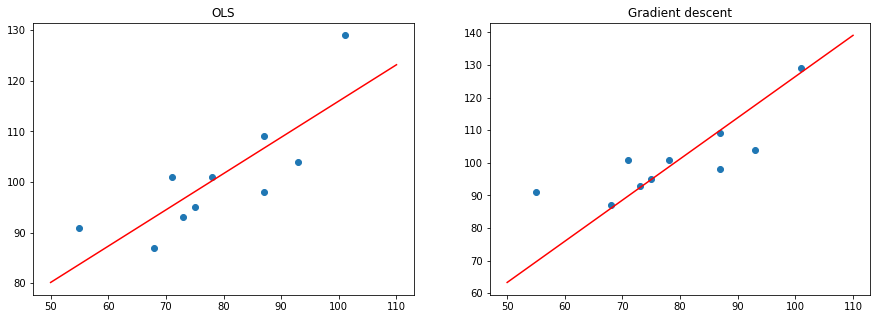

In [15]:
#4.绘制图像
from matplotlib import  pyplot as  plt
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].scatter(x,y)
axes[0].plot(np.array([50,110]),np.array([50,110])*w1+w0,'r')
axes[0].set_title('OLS')

axes[1].scatter(x,y)
axes[1].plot(np.array([50,110]),np.array([50,110])*w1_+w0_,'r')
axes[1].set_title('Gradient descent')

In [16]:
#——————————————————————————————结束